In [38]:
import sklearn.model_selection as ms
import sklearn.metrics as metrics
import sklearn.linear_model as lm

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np


In [39]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

# DATA PREPARATION

In [40]:
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']
# 0:'setosa', 1:'versicolor', 2:'virginica'

In [41]:
data = data.sample(frac=1)

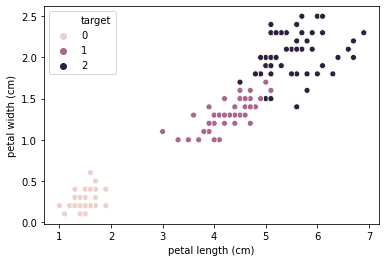

In [42]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=data, hue='target')

In [43]:
X = data.iloc[:, [2,3]]
y = (data['target'] == 2).astype(np.float64)

In [44]:
X_train, X_val, y_train, y_val = ms.train_test_split(X, y, train_size=0.7)

# SVC MODEL

In [45]:
svm_clf = Pipeline([
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge')),
                ])

svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [46]:
svm_prediction = svm_clf.predict(X_val)
svm_precision_score = metrics.precision_score(y_val, svm_prediction)
svm_precision_score

0.9

# Logistic Regression - Classifier 

In [60]:
sgd_reg = lm.SGDClassifier(random_state=42)
sgd_reg.fit(X_train, y_train)

sgd_reg_prediction = sgd_reg.predict(X_val)
sgd_reg_precision_score = metrics.precision_score(y_val, sgd_reg_prediction)
sgd_reg_precision_score


0.9166666666666666

In [1]:
import sklearn.pipeline as p
help(p.Pipeline)

Help on class Pipeline in module sklearn.pipeline:

class Pipeline(sklearn.utils.metaestimators._BaseComposition)
 |  Pipeline(steps, *, memory=None, verbose=False)
 |  
 |  Pipeline of transforms with a final estimator.
 |  
 |  Sequentially apply a list of transforms and a final estimator.
 |  Intermediate steps of the pipeline must be 'transforms', that is, they
 |  must implement fit and transform methods.
 |  The final estimator only needs to implement fit.
 |  The transformers in the pipeline can be cached using ``memory`` argument.
 |  
 |  The purpose of the pipeline is to assemble several steps that can be
 |  cross-validated together while setting different parameters.
 |  For this, it enables setting parameters of the various steps using their
 |  names and the parameter name separated by a '__', as in the example below.
 |  A step's estimator may be replaced entirely by setting the parameter
 |  with its name to another estimator, or a transformer removed by setting
 |  it 

# SVM Model with Polynomial Kernel 

In [92]:
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.svm as svm
import sklearn.pipeline as pipeline
import sklearn.preprocessing as pp
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import pandas as pd
import plotly.express as px


In [114]:
X, y = datasets.make_moons(n_samples=200, noise=0.20)

std_scaler = pp.StandardScaler()
X_scaled = std_scaler.fit_transform(X)

data = pd.DataFrame(X_scaled, columns=['x1', 'x2'])
data['target'] = y

In [115]:
x = px.scatter(data, x='x1', y='x2', color=data['target'].astype(str), title="Scatterplot of Attributes' values")
x.update_xaxes(showgrid=False)
x.update_yaxes(showgrid=False)



In [117]:
X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, train_size=0.8)

In [118]:
svm_poly_kernel = svm.SVC(kernel='poly', degree=3, coef0=1, C=5, random_state=42)
svm_poly_kernel.fit(X_train, y_train)
svm_poly_kernel_prediction = svm_poly_kernel.predict(X_test)

In [119]:
svm_poly_kernel_accuracy = metrics.accuracy_score(y_test,svm_poly_kernel_prediction)
svm_poly_kernel_precision = metrics.precision_score(y_test,svm_poly_kernel_prediction)
svm_poly_kernel_recall = metrics.recall_score(y_test,svm_poly_kernel_prediction)
svm_poly_kernel_f1 = metrics.f1_score(y_test,svm_poly_kernel_prediction)

print(svm_poly_kernel_accuracy)
print(svm_poly_kernel_precision)
print(svm_poly_kernel_recall)
print(svm_poly_kernel_f1)

0.975
0.9473684210526315
1.0
0.972972972972973


In [120]:
svm_poly_kernel_support_vectors = svm_poly_kernel.support_vectors_
svm_poly_kernel_decision_function = svm_poly_kernel.decision_function(X_test)

In [144]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=12)
    plt.ylabel(r"$x_2$", fontsize=12, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

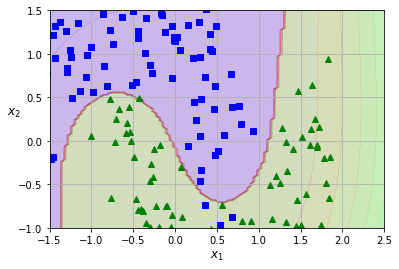

In [145]:
plot_predictions(svm_poly_kernel, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_scaled, y, [-1.5, 2.5, -1, 1.5])

In [99]:
log_reg = pipeline.Pipeline([
                            ('scaler', pp.StandardScaler()),
                            ('log_reg', lm.LogisticRegression(random_state=42))
                            ])
log_reg.fit(X_train, y_train)
log_reg_prediction = log_reg.predict(X_test)

log_reg_accuracy = metrics.accuracy_score(y_test, log_reg_prediction)
log_reg_precision = metrics.precision_score(y_test, log_reg_prediction)
log_reg_recall = metrics.recall_score(y_test, log_reg_prediction)
log_reg_f1 = metrics.f1_score(y_test, log_reg_prediction)

print(log_reg_accuracy)
print(log_reg_precision)
print(log_reg_recall)
print(log_reg_f1)

0.86
0.8415841584158416
0.8762886597938144
0.8585858585858587


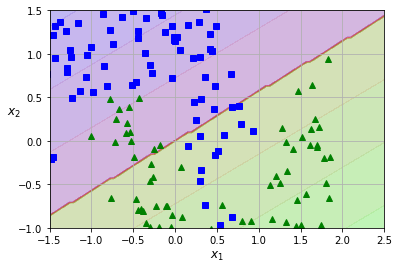

In [146]:
plot_predictions(log_reg, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_scaled, y, [-1.5, 2.5, -1, 1.5])

In [149]:
svm_rbf_kernel = pipeline.Pipeline([
                                    ('scaler', pp.StandardScaler()),
                                    ('svm_rbf_classifier', svm.SVC(kernel='rbf', gamma=5, C=0.001))
                                    ])
svm_rbf_kernel.fit(X_train, y_train)
svm_rbf_kernel_prediction = svm_rbf_kernel.predict(X_test)


svm_rbf_kernel_accuracy = metrics.accuracy_score(y_test, svm_rbf_kernel_prediction)
svm_rbf_kernel_precision = metrics.precision_score(y_test, svm_rbf_kernel_prediction)
svm_rbf_kernel_recall = metrics.recall_score(y_test, svm_rbf_kernel_prediction)
svm_rbf_kernel_f1 = metrics.f1_score(y_test, svm_rbf_kernel_prediction)

print(svm_rbf_kernel_accuracy)
print(svm_rbf_kernel_precision)
print(svm_rbf_kernel_recall)
print(svm_rbf_kernel_f1)


0.45
0.45
1.0
0.6206896551724138


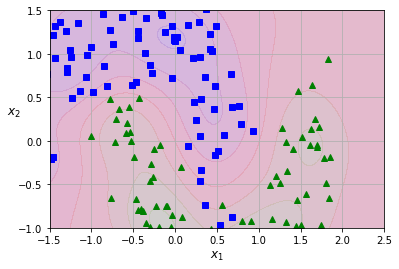

In [150]:
plot_predictions(svm_rbf_kernel, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_scaled, y, [-1.5, 2.5, -1, 1.5])

# SVM Regression

In [80]:
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.svm as svm
import sklearn.pipeline as pipeline
import sklearn.preprocessing as pp
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import pandas as pd
import numpy as np
import plotly.express as px


In [81]:
d = datasets.load_boston()
data = pd.DataFrame(d.data, columns=d.feature_names)
data['target'] = d.target
data.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54,23.4
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34,13.5
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68,16.7


In [82]:
print(d.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [83]:
data_corr = data.corr()
data_corr['CRIM'].sort_values(ascending=False)

CRIM       1.000000
RAD        0.625505
TAX        0.582764
LSTAT      0.455621
NOX        0.420972
INDUS      0.406583
AGE        0.352734
PTRATIO    0.289946
CHAS      -0.055892
ZN        -0.200469
RM        -0.219247
DIS       -0.379670
B         -0.385064
target    -0.388305
Name: CRIM, dtype: float64

In [84]:
X = d.data
y = d.target

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, train_size=0.8)

In [85]:
# THIS IS THE STANDARD LINEAR MODEL

svr_linear = svm.LinearSVR(epsilon=0.1, random_state=42)
svr_linear.fit(X_train, y_train)

svr_linear_prediction = svr_linear.predict(X_test)
svr_linear_prediction_mse = metrics.mean_squared_error(y_test, svr_linear_prediction)
svr_linear_prediction_rmse = np.sqrt(svr_linear_prediction_mse)
print(svr_linear_prediction_rmse)

5.218678260707769


In [17]:
# THIS IS THE BASE MODEL

lin_reg = lm.LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_prediction = lin_reg.predict(X_test)
lin_reg_prediction_mse = metrics.mean_squared_error(y_test, lin_reg_prediction)
lin_reg_prediction_rmse = np.sqrt(lin_reg_prediction_mse)
print(lin_reg_prediction_rmse)

4.0828719348485505


In [34]:
# THIS IS THE NON-LINEAR VERSION OF SVM BY USING A KERNALIZED SVM MODEL

svr_poly = svm.SVR(kernel='poly', degree=2, C=5, epsilon=0.1)
svr_poly.fit(X_train, y_train)

svr_poly_prediction = svr_poly.predict(X_test)
svr_poly_prediction_mse = metrics.mean_squared_error(y_test, svr_poly_prediction)
svr_poly_prediction_rmse = np.sqrt(svr_poly_prediction_mse)
print(svr_poly_prediction_rmse)

6.650763510432734
